<a href="https://colab.research.google.com/github/salamamohammedawad1986/Chatbot/blob/main/ML_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Machine learning model used simple way to get good resulte

In [49]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, GroupKFold
import matplotlib.pyplot as plt
import  seaborn as sns
from warnings import filterwarnings
%matplotlib inline
filterwarnings(action='ignore')

In [3]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

**Read dataset used sample function to select random 5 row**








In [4]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
938,7.2,0.380,0.38,2.8,0.068,23.0,42.0,0.99356,3.34,0.72,12.9,7
736,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5,5
1432,5.9,0.440,0.00,1.6,0.042,3.0,11.0,0.99440,3.48,0.85,11.7,6
1378,7.2,0.450,0.15,2.0,0.078,10.0,28.0,0.99609,3.29,0.51,9.9,6
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4


In [5]:
df = data.copy()

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [10]:
df.columns = df.columns.str.replace(' ','_')

In [11]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
sns.set()

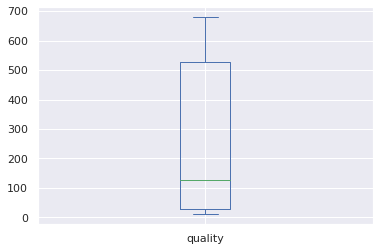

In [13]:
df.quality.value_counts().plot(kind='box')

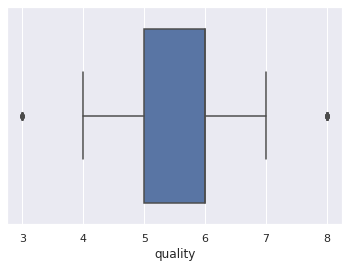

In [14]:
sns.boxplot(df['quality'])

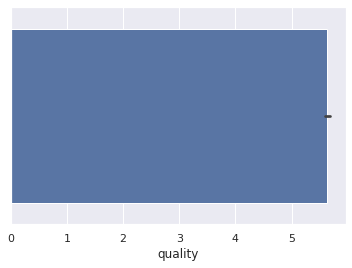

In [15]:
sns.barplot(df['quality'])

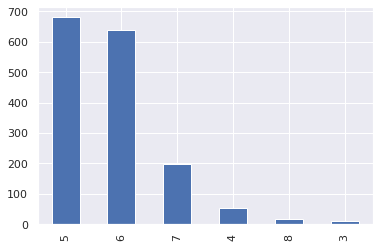

In [16]:
df.quality.value_counts().plot(kind='bar')

In [17]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
# Imblance data we check before handling.

y = df.quality
x= df.drop('quality', axis=1)

In [24]:
y

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=42, stratify= y)

In [31]:
#it’s pretty easy to simply scale a dataset:

xtrain_scale = preprocessing.scale(xtrain)


In [32]:
'''
Standardization is a common requirement for machine learning tasks. Many algorithms
assume that all features are centered around zero and have approximately the same variance.
'''
xtrain_scale

array([[-0.71955733,  0.68002645, -0.48907519, ...,  0.86956315,
        -0.35621668, -1.24021585],
       [-0.31017252,  0.34556892, -0.48907519, ...,  0.80348341,
        -0.41200349, -0.39551433],
       [-1.01197505,  1.15384128, -1.30964702, ...,  1.06780239,
        -0.74672434, -0.48937006],
       ...,
       [-1.42135985,  0.65215499, -0.79678963, ...,  1.72859984,
         0.25743821, -0.20780289],
       [ 0.9179819 ,  0.06685431, -0.07878927, ..., -2.43442411,
         1.76368203, -0.20780289],
       [-0.9534915 , -0.37908906, -0.18136075, ...,  0.53916443,
        -0.35621668,  0.16762001]])

In [34]:
xtrain_scale.mean(axis=0)

array([ 1.28893282e-16,  2.96306395e-17,  1.24448686e-16, -8.59288546e-17,
        7.18543008e-17,  7.11135349e-17,  1.77783837e-17,  3.14410716e-14,
        1.63190747e-15, -3.71864526e-16, -1.34819410e-15])

In [35]:
xtrain_scale.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
pipeline = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(n_estimators=100, random_state=123))

In [51]:
'''
find a list of all the parameters on the RandomForestRegressor documentation page. 
'''
pipeline.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(random_state=123),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 123,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std

In [52]:

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [53]:
#Now, you can see the best set of parameters found using CV:


clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [54]:
clf.fit(xtrain, ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [55]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'sqrt'}

In [56]:
#Conveniently, GridSearchCV from sklearn will automatically refit the model with the best set of hyperparameters using the entire training set.
# clf.refit

In [57]:
# To predict new dataset
y_pred = clf.predict(xtest)

In [63]:
'''
Well, the rule of thumb is that your very first model probably won’t be the best possible model.
However, we recommend a combination of three strategies to decide if you’re satisfied with your model performance.
'''
print(metrics.r2_score(ytest, y_pred))
print(metrics.mean_absolute_error(ytest, y_pred))


0.49553603759775033
0.42199999999999993


In [64]:
import joblib
joblib.dump(clf, 're_regressor.pkl')

['re_regressor.pkl']

In [65]:
load_model_rf_regessor = joblib.load('re_regressor.pkl')